## Studying correlations and regression

Could be interesting to study the correlation between filter and maybe an interesting regression problem could be to analyse if we can describe a filter as a function of the other filters! Could help solve the issue when you only have the data for some filters and want to extrapolate.

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

def get_train_test():
    # load
    df = pd.read_csv("star_classification.csv")
    # remove outliers
    # select the row with u or z or g below 0 (should not be allowed)
    outliers = df[(df["u"] <= 0)  
                | (df["z"] <= 0) 
                | (df["g"] <= 0)]

    # drop the row corresponding to the outlier
    df = df.drop(outliers.index, axis=0)
    # we drop the data we are not interested in and which won't be useful
    df = df.drop(
        columns=["obj_ID", "fiber_ID", "MJD", "plate", "spec_obj_ID", 
                 "field_ID", "cam_col", "rerun_ID", "run_ID"], axis=1)
    
    # replace all infinite values with NaN
    #df = df.replace([np.inf, -np.inf], np.nan)
    #df = df.dropna(axis=0)
    
    # replace star class with 1s and others with 0
    #df.loc[df['class'] == "STAR", 'class'] = 1
    #df.loc[df['class'] != "STAR", 'class'] = 0
    
    # stratified split
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    
    for train_index, test_index in split.split(df, df["class"]):
        strat_train_set = df.loc[train_index]
        strat_test_set = df.loc[test_index]
        
    return strat_train_set, strat_test_set, df

train, test, df = get_train_test()
train = train.reset_index(drop=True)

# seperate measurements (x) with class(y)
x_train = train.drop(columns=["class"], axis=1)
y_train = train["class"]

# replace all infinite values with NaN
x_train = x_train.replace([np.inf, -np.inf], np.nan)
y_train = y_train.replace([np.inf, -np.inf], np.nan)

# drop all the rows with NaN
x_train = x_train.dropna(axis=0)
y_train = y_train.dropna(axis=0)

C:\Users\ellio\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike


In [5]:
# finding the correlation matrix for our dataset
corr_matrix = df.corr()
# Check correlation of z filter with the rest
corr_matrix["z"].sort_values(ascending=False)

z           1.000000
i           0.971546
r           0.919114
g           0.775302
u           0.545760
redshift    0.501060
delta      -0.006286
alpha      -0.025160
Name: z, dtype: float64

In [6]:
from pandas.plotting import scatter_matrix

# selection of important attributes
attributes = ["z", "i", "r",
              "g", "u", "redshift"]
# output plots of each correlation (6x6 = 36 subplots -> each attribute with one another)
scatter_matrix(df[attributes], figsize=(12, 8));

Notice correlations between all filters but **strong** correlations between z and i, i and r, r and g. We also notice that redshift remains an important attribute and has a relatively strong correlation as is to be expected, with increasing resdshift, we have increasing distance which affects the intensity in filters. As expected as well, increasing redshift shifts the light coming from an object more towards red colours so we expect a bigger correlation with "z"(far infrared), "i" (infrared) and "r" (red).

In [7]:
print("Strong correlations between:"
      f"\n z and i: {corr_matrix['z']['i']:.3f}", 
      f"\n i and r: {corr_matrix['i']['r']:.3f}", 
      f"\n r and g: {corr_matrix['r']['g']:.3f}")

Strong correlations between:
 z and i: 0.972 
 i and r: 0.963 
 r and g: 0.933


In [8]:
print("Increasing correlations for redshift and filters with increasing wavelength:" 
      "\n u: {:.3f}".format(corr_matrix["redshift"]["u"]), 
      "\n g: {:.3f}".format(corr_matrix["redshift"]["g"]),
      "\n r: {:.3f}".format(corr_matrix["redshift"]["r"]), 
      "\n i: {:.3f}".format(corr_matrix["redshift"]["i"]), 
      "\n z: {:.3f}".format(corr_matrix["redshift"]["z"]))

Increasing correlations for redshift and filters with increasing wavelength:
 u: 0.167 
 g: 0.319 
 r: 0.433 
 i: 0.492 
 z: 0.501


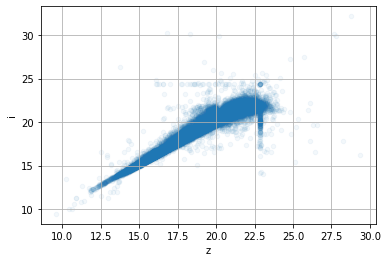

In [13]:
# relation with strongest correlation: z and i filters
import matplotlib.pyplot as plt
df.plot(kind="scatter", x="z", y="i", alpha=0.05)
plt.grid();